In [87]:
import nibabel as nib
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
nifti_img_path = './Neurohacking_data-0.0/BRAINIX/NIfTI/BRAINIX_NIFTI_Output_3D_File.nii.gz'

In [89]:
image_obj = nib.load(nifti_img_path)
type(image_obj)


nibabel.nifti1.Nifti1Image

In [90]:
header = image_obj.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 512 512  22   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.       0.46875  0.46875  5.       1.       1.       1.       1.     ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 1884.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 1884
glmin           : 0
descrip         : b'T1 SE extrp'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z    

In [91]:
#extracting data as numpy array
image_data = image_obj.get_fdata()
image_data.shape

(512, 512, 22)

In [92]:
image_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

plotting layer Layer 5, of Image


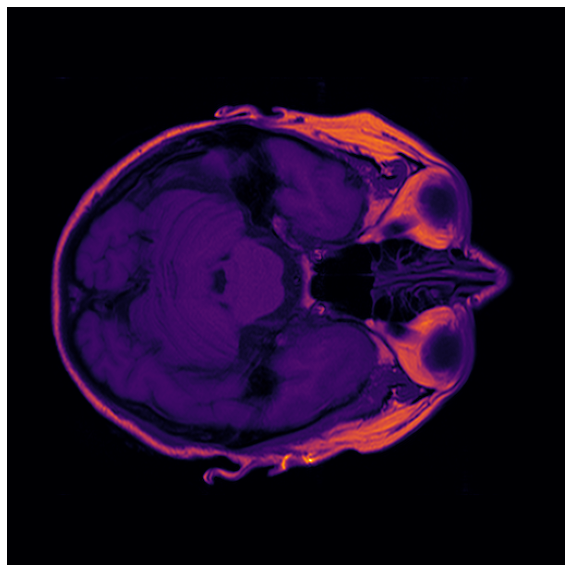

In [93]:
#Select random layer number
maxval = 22
i = np.random.randint(0,maxval)
#define
plt.figure(figsize=(10,16))
print(f'plotting layer Layer {i}, of Image')
plt.imshow(image_data[:, :, i], cmap='inferno')
plt.axis('off')
plt.show()


In [94]:
def explore_3D_img(layer):
   # plt.figure(figsize=(12,20))
    plt.imshow(image_data[:, :, layer,], cmap='inferno')
    plt.title(f'Layer {layer} of Brain MRI Z-axis',fontsize=20)
    plt.axis('on')
    return  plt.show()
interact(explore_3D_img,layer=(0,image_data.shape[2]-1))

interactive(children=(IntSlider(value=10, description='layer', max=21), Output()), _dom_classes=('widget-inter…

<function __main__.explore_3D_img(layer)>

In [95]:
def explore_3D_img(layer):
   # plt.figure(figsize=(12,20))
    plt.imshow(image_data[:, layer, :,], cmap='inferno')
    plt.title(f'Layer {layer} of Brain MRI Y-axis',fontsize=20)
    plt.axis('on')
    return  plt.show()
interact(explore_3D_img,layer=(0,image_data.shape[1]-1))

interactive(children=(IntSlider(value=255, description='layer', max=511), Output()), _dom_classes=('widget-int…

<function __main__.explore_3D_img(layer)>

In [96]:
def explore_3D_img(layer):
   # plt.figure(figsize=(12,20))
    plt.imshow(image_data[layer, :, :,], cmap='inferno')
    plt.title(f'Layer {layer} of Brain MRI X-axis',fontsize=20)
    plt.axis('on')
    return  plt.show()
interact(explore_3D_img,layer=(0,image_data.shape[0]-1))

interactive(children=(IntSlider(value=255, description='layer', max=511), Output()), _dom_classes=('widget-int…

<function __main__.explore_3D_img(layer)>

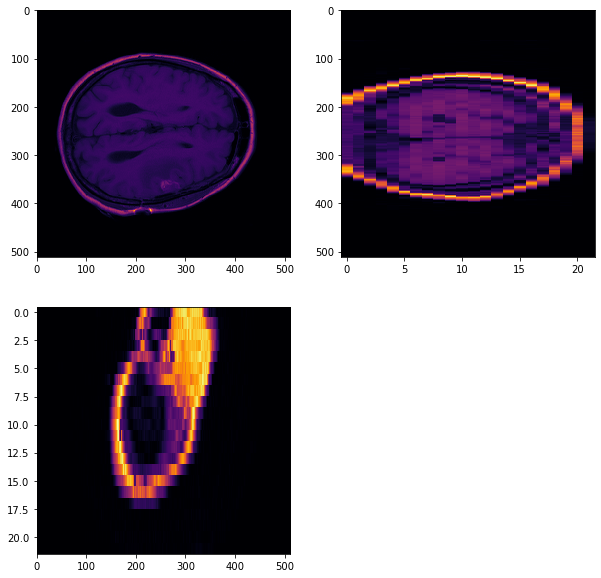

In [127]:

plt.subplots(figsize=(10,10))

a1 = plt.subplot(2, 2,1)
plt.imshow(image_data[:, :, 12],interpolation='nearest', aspect='auto',cmap='inferno')


a2 = plt.subplot(2, 2, 2)
plt.imshow(image_data[:, 100, :],interpolation='nearest', aspect='auto',cmap='inferno')


a3 = plt.subplot(2, 2, 3)
plt.imshow(image_data[106, :, :].T,interpolation='nearest', aspect='auto',cmap='inferno')



In [99]:
#using affine to find the image array data in refrence space
image_obj_affine = image_obj.affine
image_obj_affine

array([[-0.46875,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.46875,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  5.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     ,  1.     ]])